<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/linear_regression_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 単回帰

## 訓練データ生成

In [ ]:
n_sample = 100 # 標本数
var = .2 # 標準偏差

# 関数:y=2x+5のy座標を返す
def linear_func(x):
    return 2 * x + 5

# 関数:２乗誤差を無理やり作っちゃうのかよ
def add_noise(y_true, var): # y_true:データ配列
# loc:平均, scale:標準偏差, size:出力数
    return y_true + np.random.normal(scale=var, size=y_true.shape)

# 関数:グラフを描く
def plt_result(xs_train, ys_true, ys_train):
    # scatterは、〇を打つ。s=は直径。edgecolor=は色。
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="y", s=50,  label="training data")
    # plotは線を引く。（点をつなぐ）
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend() # 凡例

xs: (100,)
ys_true: (100,)
ys: (100,)


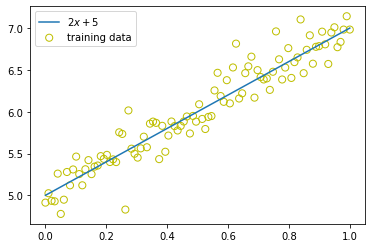

In [ ]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

In [ ]:
#numpy実装の回帰
def train(xs, ys):
  # ddofとは？
  # Means Delta Degrees of Freedom. The divisor used in calculations is N – ddof, where N represents the number of elements. By default ddof is zero.
  # つまり、分散の計算の際にN − ddofで割っていて、デフォルトではddof=0なので、母分散及び母集団の標準偏差として計算される。
  # ddof=1とすると不偏分散およびその平方根として計算される。
  # http://taustation.com/numpy-var-std-ddof/
    cov = np.cov(xs, ys, ddof=0)
    # coefficient 回帰係数（傾き）（cov[0,1]は共分散行列の0行1列目（0始まり））
    a = cov[0, 1] / cov[0, 0]
    # bはintercept y切片（回帰直線がx,yそれぞれの平均を通ることから）
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("共分散行列cov: {}".format(cov))
print("回帰係数（傾き）coef: {}".format(a))

共分散行列cov: [[0.08501684 0.17216781]
 [0.17216781 0.3822936 ]]
回帰係数（傾き）coef: 2.0251025352597427


## 予測

入力に対する値を$y(x) = a x + b$で予測する

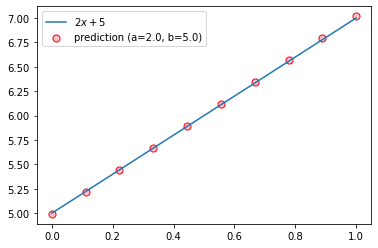

In [ ]:
xs_new = np.linspace(0, 1, int(n_sample/10))
ys_pred = a * xs_new + b

# plt.scatter(xs, ys, facecolor="pink", edgecolor="r", s=50, label="training data")
plt.plot(xs, ys_true, label="$2 x + 5$")
# 書式 a={:.2} :はお決まり，.2は有効桁数
# https://note.nkmk.me/python-format-zero-hex/
plt.scatter(xs_new, ys_pred, facecolor="pink", edgecolor="r", s=50, label="prediction (a={:.2}, b={:.2})".format(a, b))
# plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

# 重回帰分析

## 訓練データ生成 (3次元入力)

In [ ]:
np.random.random((10, 3))

array([[0.92381594, 0.58641009, 0.27298942],
       [0.88908229, 0.1500866 , 0.05449508],
       [0.54154632, 0.55785215, 0.9226696 ],
       [0.29434333, 0.83122968, 0.42958981],
       [0.47944023, 0.38045028, 0.10517734],
       [0.15994898, 0.73989621, 0.88376799],
       [0.07885039, 0.8342851 , 0.02176349],
       [0.9591204 , 0.69968524, 0.28812214],
       [0.98124131, 0.32494135, 0.64038611],
       [0.82856608, 0.15021907, 0.48277574]])

In [ ]:
n_sample = 100
var = .2

def mul_linear_func(x):
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

In [ ]:
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x_{i} = \boldsymbol{w}^{\mathrm{T}}  \boldsymbol{x}$

ただし、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

訓練データ$X, \boldsymbol{y}$に対しては$\boldsymbol{y} = X \boldsymbol{w}$と書ける。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - X \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 X^{\mathrm{T}} (\boldsymbol{y} - X \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} \boldsymbol{y}$

In [ ]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)
# pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
# w = np.dot(pinv, y_train)

## 予測

入力に対する値を$y(x) = \hat{\boldsymbol{w}}^{\mathrm{T}}  \boldsymbol{x} \ (\boldsymbol{y} = X\hat{\boldsymbol{w}})$で予測する

## パラメータ推定結果

In [ ]:
ww = [1., 0.5, 2., 1.]

In [ ]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0   w0_estimated: -0.43
w1_true:   0.5   w1_estimated: 1.2e+01
w2_true:   2.0   w2_estimated: -3.4e+01
w3_true:   1.0   w3_estimated: 2.2e+01
